<a href="https://colab.research.google.com/github/Harshavardhan123-cloud/ML/blob/master/SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)  # Initialize weights, including bias
        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)

        return self

    def predict(self, X):
        # Compute the net input (weighted sum)
        net_input = np.dot(X, self.weights[1:]) + self.weights[0]
        # Apply the step function to make predictions
        return np.where(net_input >= 0, 1, -1)

    def test(self, X):
        # Make predictions for a test set
        predictions = []
        for xi in X:
            prediction = self.predict(xi)
            predictions.append(prediction)
        return np.array(predictions)

    def accuracy(self, y_pred, y_true):
        # Calculate accuracy given predicted and true labels
        correct = np.sum(y_pred == y_true)
        total = len(y_true)
        return correct / total



In [26]:
import pandas as pd
import numpy as np
df= pd.read_csv("high_elo_opening.csv")
df.tail(7)

,opening_name,side,num_games,ECO,last_played_date,perf_rating,avg_player,perc_player_win,perc_draw,pec_opponent_win,...,move2b,move3w,move3b,move4w,move4b,perc_white_win,perc_black_win,white_odds,white_wins,black_wins
1877,"Zukertort Opening, Reversed Queen's Gambit",black,2316,D02,2018-06-25,2200,2217,34.9,29.5,35.5,...,c5,NaN,NaN,NaN,NaN,35.5,34.9,1.017192,822.180,808.284
1878,"Zukertort Opening, Santasiere's Folly",white,262,A06,2018-06-17,2125,2155,32.8,29.4,37.8,...,NaN,NaN,NaN,NaN,NaN,32.8,37.8,0.867725,85.936,99.036
1879,"Zukertort Opening, Sicilian Invitation",black,20045,A04,2018-07-09,2274,2293,31.4,33.9,34.7,...,NaN,NaN,NaN,NaN,NaN,34.7,31.4,1.105096,6955.615,6294.130
1880,"Zukertort Opening, Slav Invitation",black,463,A04,2018-07-05,2031,2025,27.0,26.1,46.9,...,NaN,NaN,NaN,NaN,NaN,46.9,27.0,1.737037,217.147,125.010
1881,"Zukertort Opening, Symmetrical Variation",black,15625,A04,2018-07-09,2235,2257,28.4,34.4,37.1,...,NaN,NaN,NaN,NaN,NaN,37.1,28.4,1.306338,5796.875,4437.500
1882,"Zukertort Opening, Tennison Gambit",white,139,A06,2018-05-19,1936,1976,36.7,19.4,43.9,...,NaN,NaN,NaN,NaN,NaN,36.7,43.9,0.835991,51.013,61.021
1883,"Zukertort Opening, Wade Defense, Chigorin Plan",black,217,A41,2018-02-10,2307,2380,21.7,34.1,44.2,...,Bg4,c4,Nd7,Qb3,Rb8,44.2,21.7,2.036866,95.914,47.089


In [27]:
df.iloc[142:150, 0:12]

,opening_name,side,num_games,ECO,last_played_date,perf_rating,avg_player,perc_player_win,perc_draw,pec_opponent_win,moves_list,move1w
142,"Caro-Kann Defense, Classical Variation, Marocz...",white,246,B18,2018-06-05,2186,2113,46.3,25.6,28.1,"['1.e4', 'c6', '2.d4', 'd5', '3.Nc3', 'dxe4', ...",e4
143,"Caro-Kann Defense, Classical Variation, Seiraw...",white,7783,B19,2018-07-08,2287,2246,36.1,41.0,22.8,"['1.e4', 'c6', '2.d4', 'd5', '3.Nc3', 'dxe4', ...",e4
144,"Caro-Kann Defense, De Bruycker Defense",black,330,A40,2018-05-31,2161,2254,30.9,27.3,41.8,"['1.e4', 'c6', '2.d4', 'Na6']",e4
145,"Caro-Kann Defense, Euwe Attack",white,145,B10,2018-05-25,2157,2140,37.9,23.4,38.6,"['1.e4', 'c6', '2.b3']",e4
146,"Caro-Kann Defense, Exchange Variation, Rubinst...",white,2966,B13,2018-07-07,2186,2142,35.3,35.4,29.3,"['1.e4', 'c6', '2.d4', 'd5', '3.exd5', 'cxd5',...",e4
147,"Caro-Kann Defense, Exchange Variation",white,7846,B13,2018-07-08,2089,2065,31.9,30.2,37.9,"['1.e4', 'c6', '2.d4', 'd5', '3.exd5']",e4
148,"Caro-Kann Defense, Finnish Variation",black,128,B16,2018-06-14,2139,2193,33.6,26.6,39.8,"['1.e4', 'c6', '2.d4', 'd5', '3.Nc3', 'dxe4', ...",e4
149,"Caro-Kann Defense, Forgacs Variation",white,637,B15,2018-06-30,2348,2309,31.7,47.4,20.9,"['1.e4', 'c6', '2.d4', 'd5', '3.Nc3', 'dxe4', ...",e4


In [28]:
y = df.iloc[0:1883, 1].values
y

array(['white', 'black', 'white', ..., 'black', 'black', 'white'],
      dtype=object)

In [29]:
y= np.where(y == 'black', -1,1)
print(y)

[ 1 -1  1 ... -1 -1  1]


In [30]:
X=df.iloc[0:1883, [5,6]].values
X

array([[2247, 2225],
       [2145, 2193],
       [2244, 2194],
       ...,
       [2031, 2025],
       [2235, 2257],
       [1936, 1976]])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test, y_test

(array([[2190, 2197],
        [2140, 2133],
        [2299, 2318],
        [2320, 2284],
        [1966, 2063],
        [2083, 2128],
        [2327, 2347],
        [2355, 2334],
        [2298, 2247],
        [2368, 2331],
        [2405, 2375],
        [1935, 1983],
        [2334, 2295],
        [2271, 2294],
        [2138, 2148],
        [2208, 2182],
        [2060, 2112],
        [2222, 2268],
        [2145, 2193],
        [2221, 2257],
        [2119, 2134],
        [2190, 2235],
        [2513, 2438],
        [2349, 2298],
        [2263, 2212],
        [2212, 2190],
        [2237, 2207],
        [2349, 2306],
        [2103, 2063],
        [2284, 2326],
        [1963, 1982],
        [2093, 2142],
        [2442, 2408],
        [2134, 2126],
        [2180, 2198],
        [2312, 2390],
        [2396, 2341],
        [2162, 2162],
        [2182, 2236],
        [2215, 2202],
        [2147, 2180],
        [2380, 2351],
        [2252, 2303],
        [2316, 2292],
        [2355, 2358],
        [2

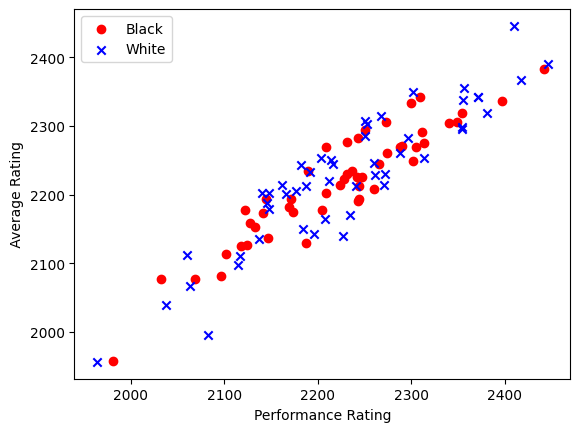

In [56]:
import matplotlib.pyplot as plt
plt.scatter(X[:50,0], X[:50,1],color='red', marker='o', label='Black')
plt.scatter(X[50:100,0], X[50:100, 1], color="blue", marker='x', label='White')
plt.xlabel('Performance Rating')
plt.ylabel(' Average Rating ')
plt.legend(loc='upper left')
plt.show()


Final bias: -1.7999999999999998
Final weight vector: [ 14739.2 -13936.6]


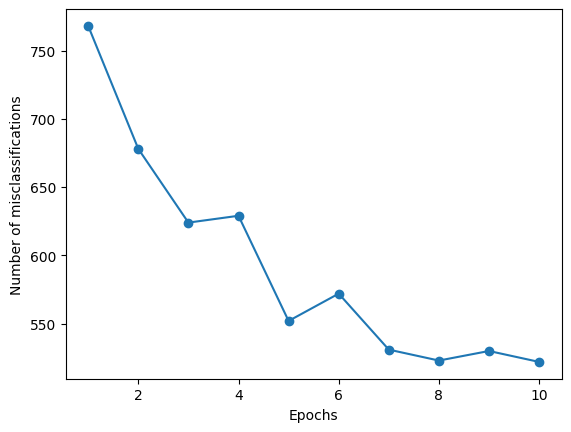

In [57]:

pn = Perceptron(0.1, 10)
pn.fit(X_train, y_train)
print(f"Final bias: {pn.weights[0]}")
print(f"Final weight vector: {pn.weights[1:]}")
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [58]:
y_predict1 = pn.test(X_test)
accuracy = pn.accuracy(y_predict1, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.47480106100795755


In [59]:
from matplotlib import markers
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.1):
    markers_list = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers_list[idx], label=cl)



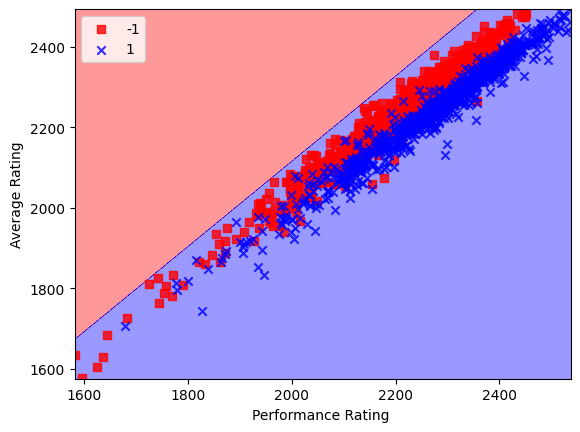

In [60]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('Performance Rating ')
plt.ylabel('Average Rating')
plt.legend(loc = 'upper left')
plt.show()